In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

In [21]:
gold_data=pd.read_csv('/content/gld_price_data.csv')

In [22]:
gold_data.shape

(2290, 6)

In [23]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [24]:
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [25]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [26]:
print(gold_data.columns)

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')


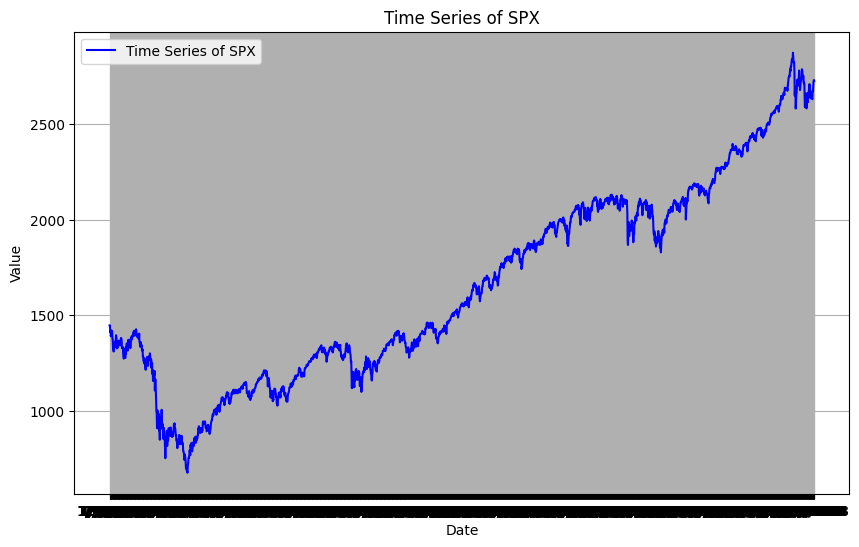

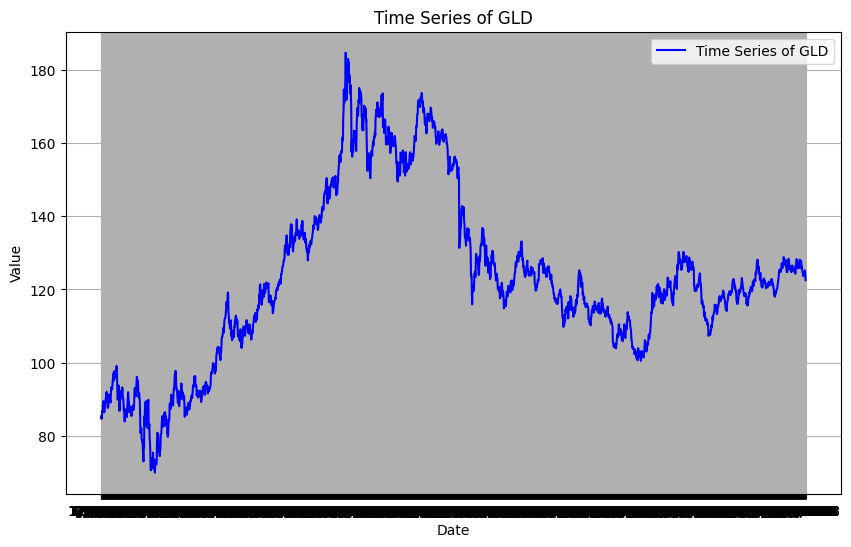

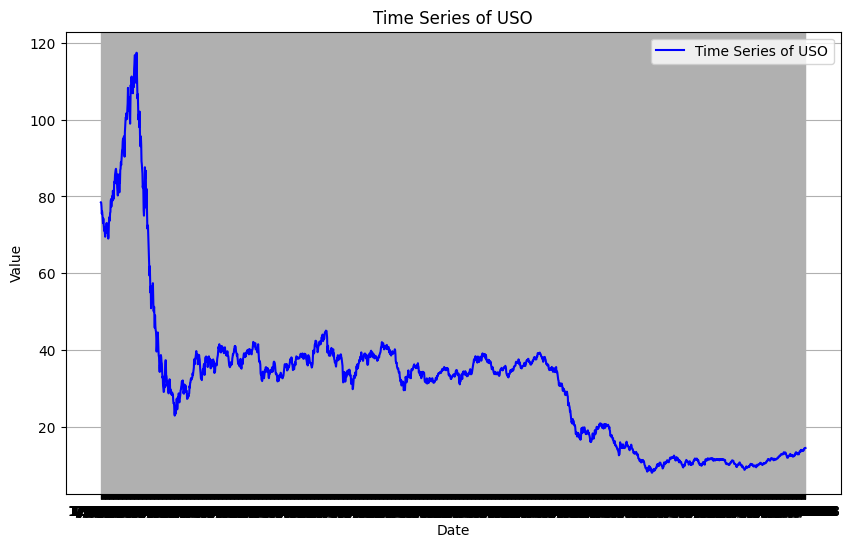

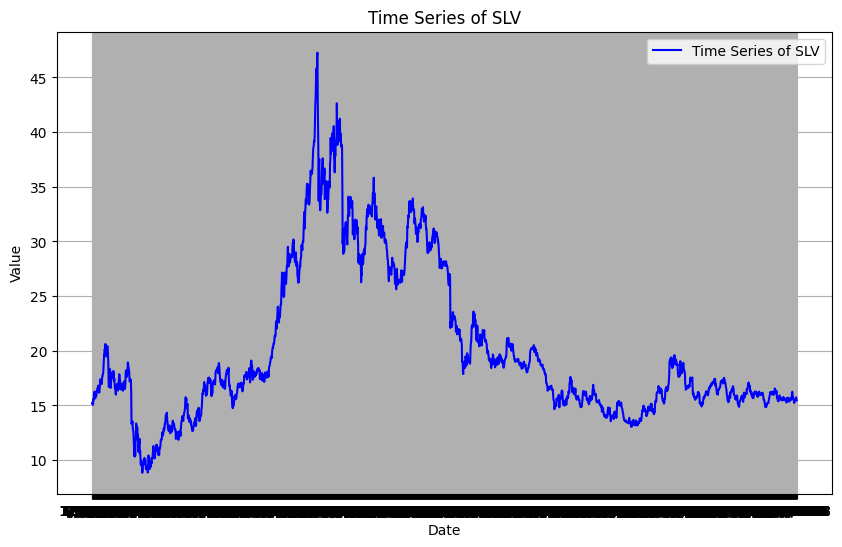

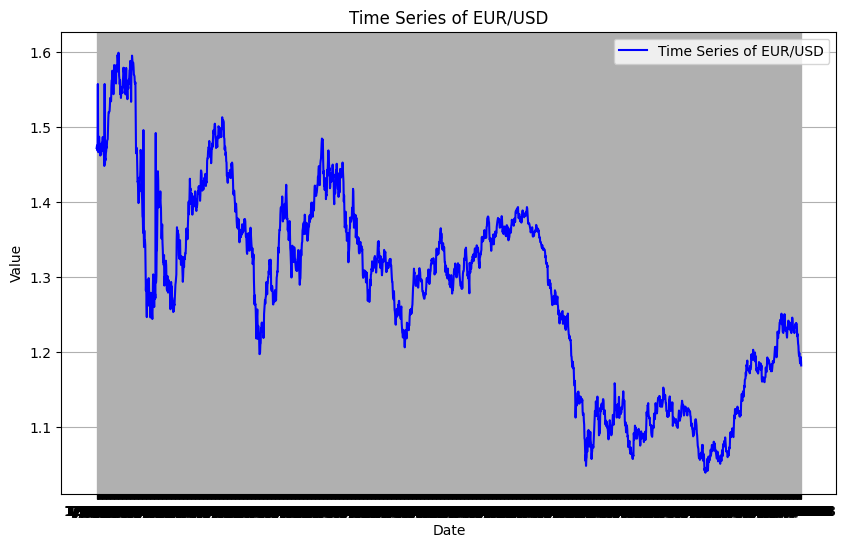

In [27]:
def plot_time_series(date, values, title):
    plt.figure(figsize=(10, 6))
    plt.plot(date, values, label=title, color='blue')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.grid(True)
    plt.legend()
    plt.show()

# Loop through each column and plot its time series
for column in ['SPX', 'GLD', 'USO', 'SLV', 'EUR/USD']:
    plot_time_series(gold_data['Date'], gold_data[column], title=f'Time Series of {column}')


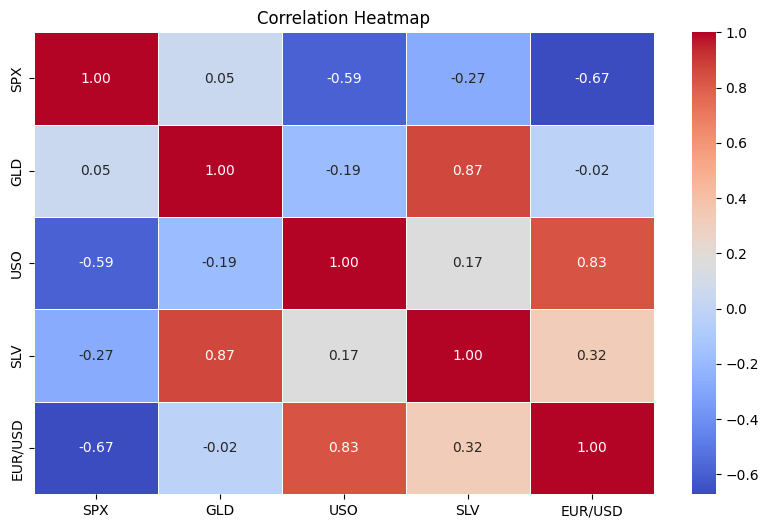

In [28]:
correlation_matrix = gold_data[['SPX', 'GLD', 'USO', 'SLV', 'EUR/USD']].corr()

# Function to plot the heatmap
def plot_heatmap(correlation_matrix, title):
    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title(title)
    plt.show()

# Plot the correlation heatmap
plot_heatmap(correlation_matrix, title='Correlation Heatmap')

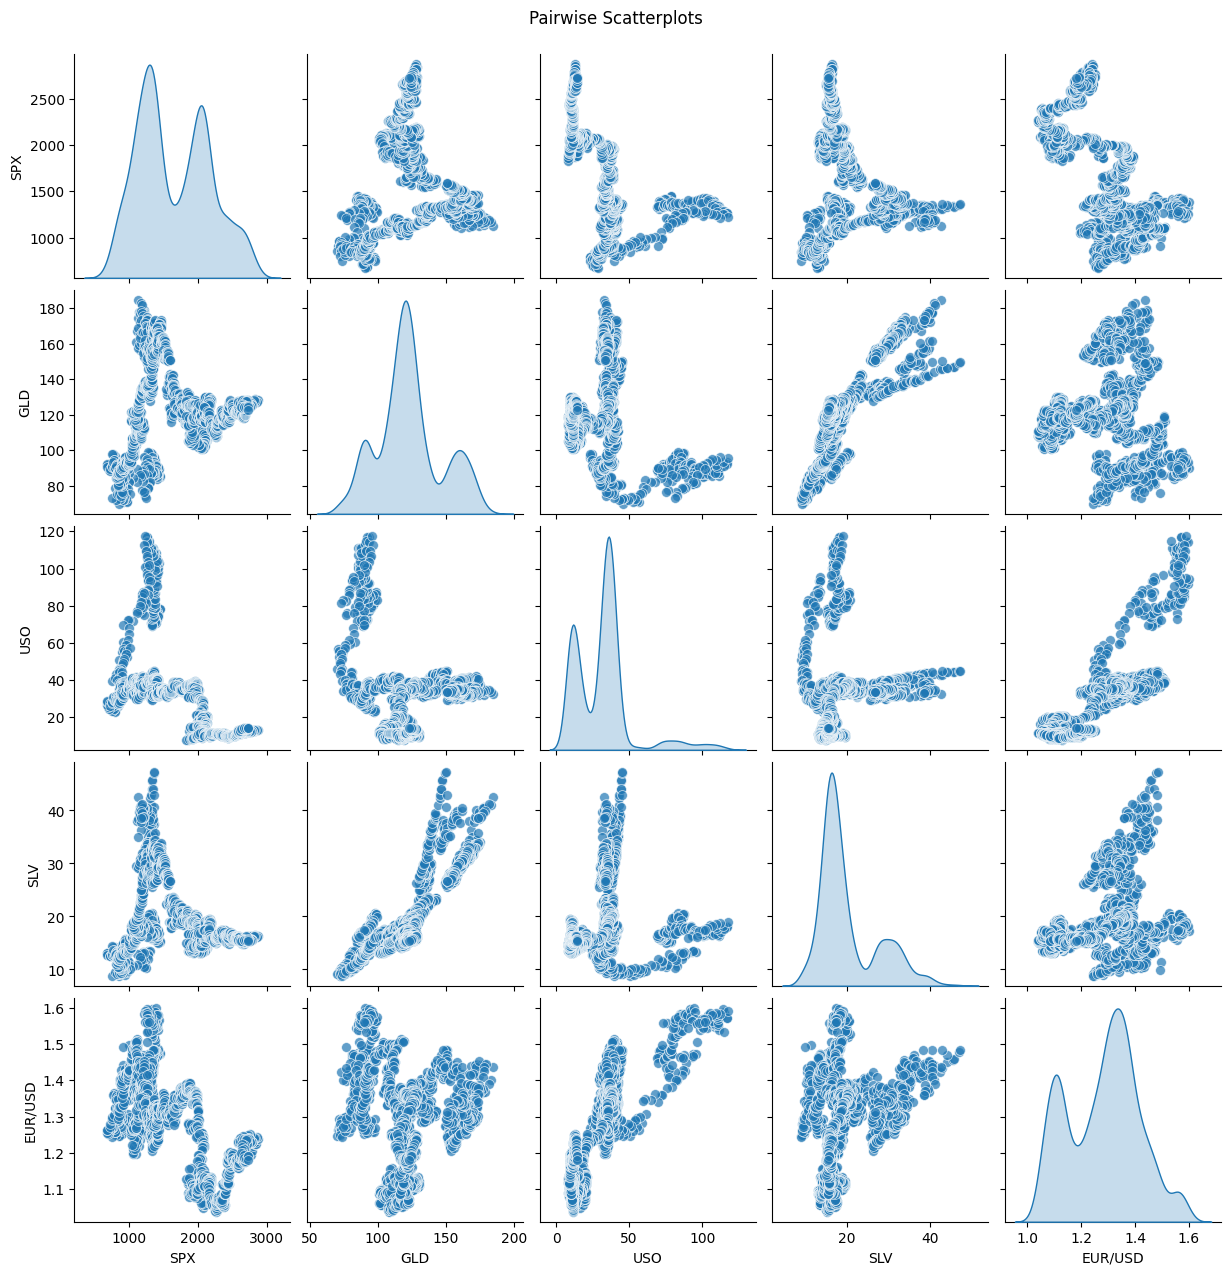

In [29]:
def plot_pairwise_scatter(data_subset):
    sns.pairplot(data_subset, diag_kind='kde', plot_kws={'alpha': 0.7, 's': 50})
    plt.suptitle('Pairwise Scatterplots', y=1.02)
    plt.show()

# Call the function with the selected columns
plot_pairwise_scatter(gold_data[['SPX', 'GLD', 'USO', 'SLV', 'EUR/USD']])

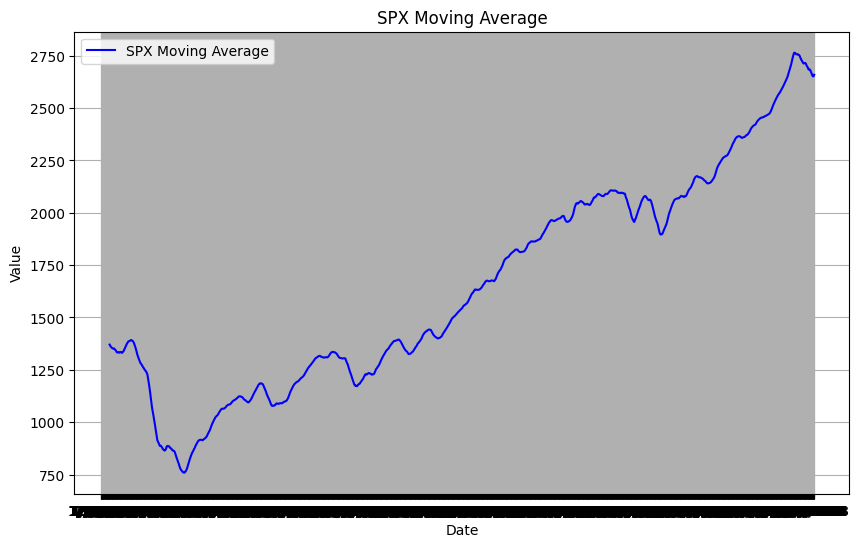

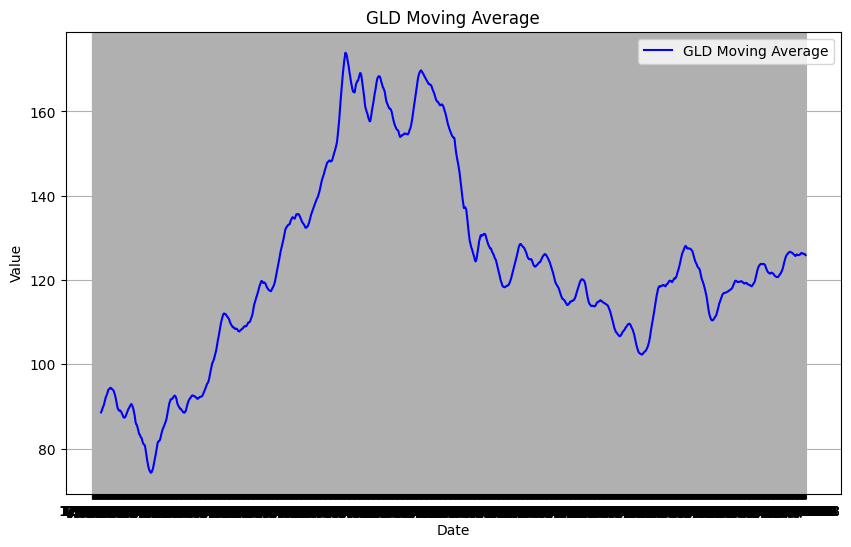

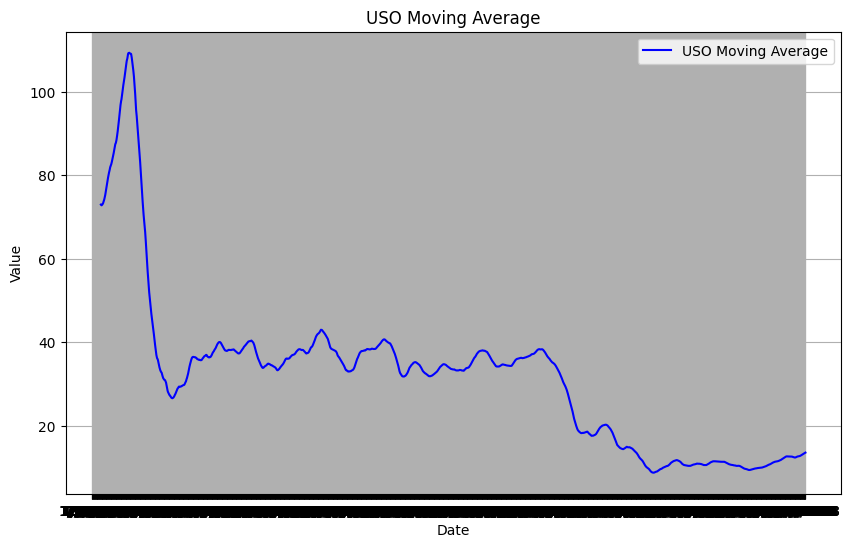

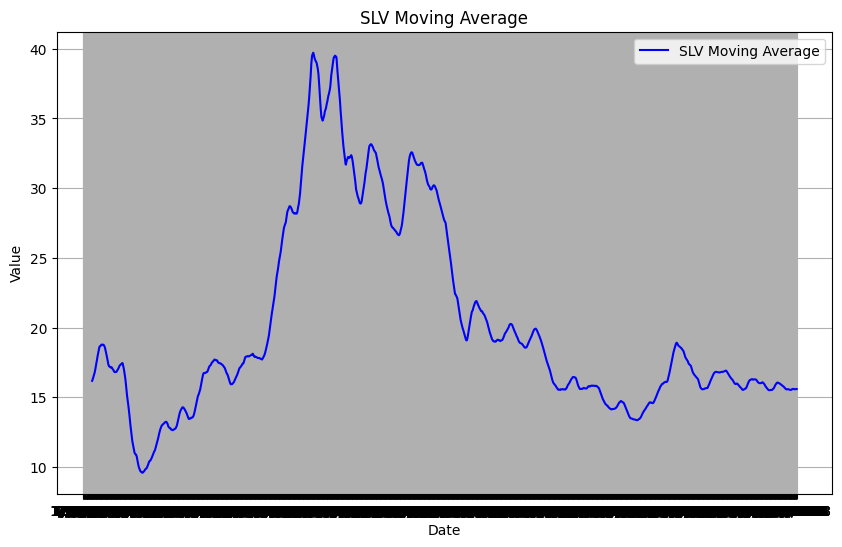

In [30]:
# Function to calculate the moving average
def calculate_moving_average(values, window):
    return values.rolling(window=window).mean()

# Function to plot a time series
def plot_time_series(date, values, title):
    plt.figure(figsize=(10, 6))
    plt.plot(date, values, label=title, color='blue')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.grid(True)
    plt.legend()
    plt.show()

# Loop through the columns, calculate moving averages, and plot
for column in ['SPX', 'GLD', 'USO', 'SLV']:
    gold_data[f'{column}_MA'] = calculate_moving_average(gold_data[column], window=30)
    plot_time_series(gold_data['Date'], gold_data[f'{column}_MA'], title=f'{column} Moving Average')


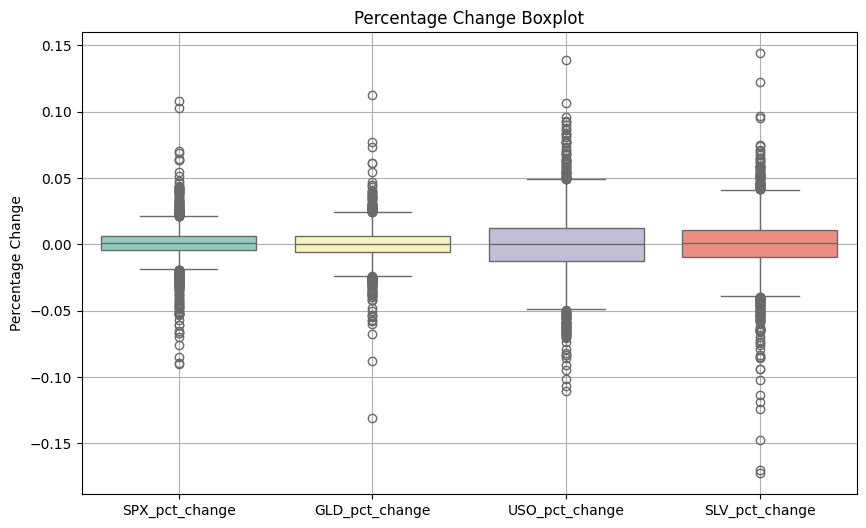

In [31]:
def calculate_percentage_change(values):
    return values.pct_change()

# Function to plot a boxplot
def plot_boxplot(data_subset):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data_subset, palette='Set3')
    plt.title('Percentage Change Boxplot')
    plt.ylabel('Percentage Change')
    plt.grid(True)
    plt.show()

# Loop through the columns, calculate percentage changes
for column in ['SPX', 'GLD', 'USO', 'SLV']:
    gold_data[f'{column}_pct_change'] = calculate_percentage_change(gold_data[column])

# Plot the boxplot for percentage changes
plot_boxplot(gold_data[['SPX_pct_change', 'GLD_pct_change', 'USO_pct_change', 'SLV_pct_change']])

splitting the features and the target

In [36]:
#x=gold_data.drop(['Date','GLD'],axis=1)
x=gold_data['SPX']+gold_data['USO']+gold_data['SLV']+gold_data['EUR/USD']
y=gold_data['GLD']

In [37]:
print(x,y)

0       1542.281727
1       1542.289528
2       1505.582495
3       1508.201353
4       1483.397038
           ...     
2285    2702.676711
2286    2728.874761
2287    2754.411821
2288    2761.263001
2289    2756.822062
Length: 2290, dtype: float64 0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [39]:
x.shape

(2290,)

In [40]:
gold_data.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD', 'SPX_MA', 'GLD_MA',
       'USO_MA', 'SLV_MA', 'SPX_pct_change', 'GLD_pct_change',
       'USO_pct_change', 'SLV_pct_change'],
      dtype='object')

In [46]:
# Drop the moving average and percentage change columns
columns_to_remove = [
    'SPX_MA', 'GLD_MA', 'USO_MA', 'SLV_MA',
    'SPX_pct_change', 'GLD_pct_change', 'USO_pct_change', 'SLV_pct_change'
]

# Remove the columns if they exist in the dataset
gold_data = gold_data.drop(columns=[col for col in columns_to_remove if col in gold_data.columns])

# Verify the columns in the dataset
print(gold_data.columns)


Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')


In [47]:
x=gold_data.drop(['Date','GLD'],axis=1)
y=gold_data['GLD']

In [48]:
print(x,y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns] 0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


splitting into training an test data

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [57]:
x.shape,x_train.shape,y.shape,y_train.shape


((2290, 4), (1832, 4), (2290,), (1832,))

Model training:
Random forest regressor

In [58]:
regressor=RandomForestRegressor(n_estimators=100)

In [59]:
#training the model
regressor.fit(x_train,y_train)

RandomForestRegressor()

Model evaluation

In [60]:
test_data_prediction=regressor.predict(x_test)

In [61]:
#R square error
error_score=metrics.r2_score(y_test,test_data_prediction)
print('R square error:',error_score)

R square error: 0.9894605387011138


compare the actual values and predicted values in a plot

In [62]:
y_test=list(y_test)

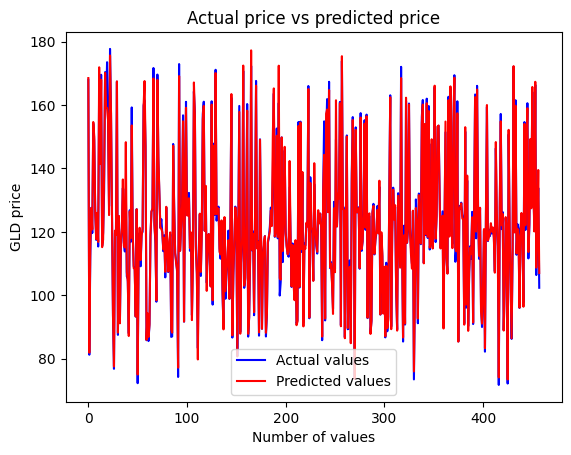

In [65]:
plt.plot(y_test,color='blue',label='Actual values')
plt.plot(test_data_prediction,color='red',label='Predicted values')
plt.title('Actual price vs predicted price')
plt.xlabel('Number of values')
plt.ylabel('GLD price')
plt.legend()
plt.show()